In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# A simple example of clustering

In [11]:
pwd

'/Users/brandonmojica/Desktop/Galvanize/Capstones/Capstone_3/nba_postion_classification/notebooks'

In [4]:

df_example = pd.read_csv('/Users/brandonmojica/Desktop/positional-clustering/final-csv-data/clustering-example.csv')

In [5]:
stl_leaders = df_example[0:5]
blk_leaders = df_example[5:]

In [12]:
blk_leaders

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5,1,Myles Turner,C,22,IND,74,74,28.6,5.1,10.5,...,0.736,1.4,5.8,7.2,1.6,0.8,2.7,1.4,2.6,13.3
6,2,Mitchell Robinson,C,20,NYK,66,19,20.6,3.1,4.4,...,0.600,2.7,3.7,6.4,0.6,0.8,2.4,0.5,3.3,7.3
7,3,Rudy Gobert,C,26,UTA,81,80,31.8,5.9,8.8,...,0.636,3.8,9.0,12.9,2.0,0.8,2.3,1.6,2.9,15.9
8,4,Brook Lopez,C,30,MIL,81,81,28.7,4.4,9.7,...,0.842,0.4,4.5,4.9,1.2,0.6,2.2,1.0,2.3,12.5
9,5,JaVale McGee,C,31,LAL,75,62,22.3,5.3,8.5,...,0.632,2.6,4.9,7.5,0.7,0.6,2.0,1.4,2.8,12.0


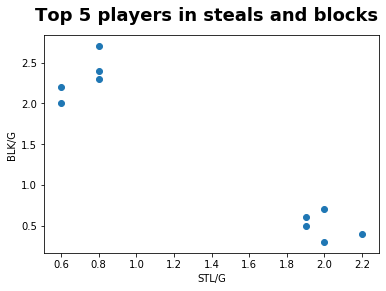

In [7]:
stl_blk, ax = plt.subplots()

ax.scatter(df_example['STL'], df_example['BLK'])

ax.set_xlabel('STL/G')
ax.set_ylabel('BLK/G')

stl_blk.suptitle("Top 5 players in steals and blocks", weight = 'bold', size = 18)

stl_blk.savefig('stl-blk.png', dpi = 400, bbox_inches = 'tight')

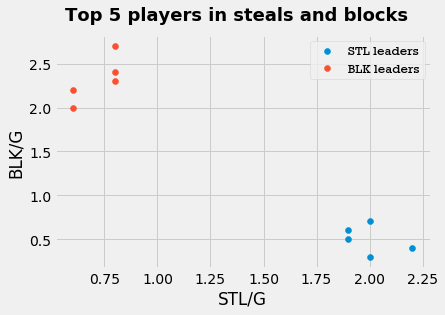

In [12]:
plt.style.use('fivethirtyeight')

stl_blk_separated, ax = plt.subplots()

ax.scatter(stl_leaders['STL'], stl_leaders['BLK'], label = 'STL leaders')
ax.scatter(blk_leaders['STL'], blk_leaders['BLK'], label = 'BLK leaders')

ax.legend(loc='best', prop={'size': 12, "family": "Rockwell"})

ax.set_xlabel('STL/G')
ax.set_ylabel('BLK/G')

stl_blk_separated.suptitle("Top 5 players in steals and blocks", weight = 'bold', size = 18)
stl_blk_separated.savefig('stl-blk-separated.png', dpi = 400, bbox_inches = 'tight')

In [13]:
kmeans = KMeans(n_clusters = 2, random_state = 0)

x = np.column_stack((df_example['STL'], df_example['BLK']))

kmeans.fit(x)

y_kmeans = kmeans.predict(x)

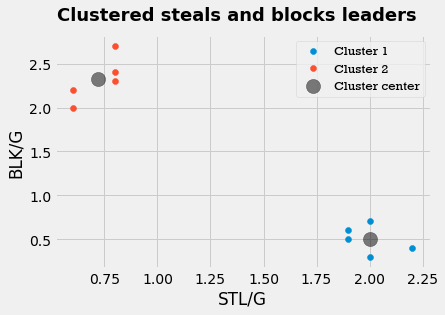

In [14]:
plt.style.use('fivethirtyeight')

stl_blk_clustered, ax = plt.subplots()

cluster_1 = []
cluster_2 = []

for i in range(len(y_kmeans)):
    if(y_kmeans[i] == 0):
        cluster_1.append(x[i])
    elif(y_kmeans[i] == 1):
        cluster_2.append(x[i])
        
cluster_1 = np.vstack(cluster_1)
cluster_2 = np.vstack(cluster_2)

ax.scatter(cluster_1[:, 0], cluster_1[:, 1], label = "Cluster 1")
ax.scatter(cluster_2[:, 0], cluster_2[:, 1], label = "Cluster 2")

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = .5, label = 'Cluster center')

ax.legend(loc='best', prop={'size': 12, "family": "Rockwell"})

ax.set_xlabel('STL/G')
ax.set_ylabel('BLK/G')

stl_blk_clustered.suptitle("Clustered steals and blocks leaders", weight = 'bold', size = 18)

stl_blk_clustered.savefig('stl-blk-clustered.png', dpi = 400, bbox_inches = 'tight')

Let's add a couple more features to this to see how we can differentiate the players differently

In [8]:
kmeans = KMeans(n_clusters = 2, random_state = 0)

x = np.column_stack((df_example['PTS'], df_example['TRB'], df_example['AST'], df_example['STL'], df_example['BLK']))

kmeans.fit(x)

y_kmeans = kmeans.predict(x)

In [9]:
for i, j in zip(df_example['Player'], y_kmeans):
    print(i, j)

Paul George 1
James Harden 1
Chris Paul 0
Jimmy Butler 0
Russell Westbrook 1
Myles Turner 0
Mitchell Robinson 0
Rudy Gobert 0
Brook Lopez 0
JaVale McGee 0


When we add other features to the cluster, the model clusters superstars together

# Cluster the top 50 players in PPG

In [17]:
df_counting = pd.read_csv('/Users/brandonmojica/Desktop/positional-clustering/final-csv-data/counting-stats.csv')
df_advanced = pd.read_csv('/Users/brandonmojica/Desktop/positional-clustering/final-csv-data/advanced-stats.csv')

In [18]:
kmeans = KMeans(n_clusters = 3, random_state = 98)

x = np.column_stack((df_counting['PTS'], df_advanced['USG%']))

kmeans.fit(x)

y_kmeans = kmeans.predict(x)

In [20]:
df_counting['cluster'] = y_kmeans

In [21]:
df_counting

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster
0,1,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,...,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,2
1,2,Paul George,SF,28,OKC,77,77,36.9,9.2,21.0,...,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0,1
2,3,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,...,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,1
3,4,Joel Embiid,C,24,PHI,64,64,33.7,9.1,18.7,...,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5,1
4,5,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,...,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3,1
5,6,Kawhi Leonard,SF,27,TOR,60,60,34.0,9.3,18.8,...,1.3,6.0,7.3,3.3,1.8,0.4,2.0,1.5,26.6,1
6,7,Devin Booker,SG,22,PHO,64,64,35.0,9.2,19.6,...,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6,1
7,8,Kevin Durant,PF,30,GSW,78,78,34.6,9.2,17.7,...,0.4,5.9,6.4,5.9,0.7,1.1,2.9,2.0,26.0,1
8,9,Damian Lillard,PG,28,POR,80,80,35.5,8.5,19.2,...,0.9,3.8,4.6,6.9,1.1,0.4,2.7,1.9,25.8,1
9,10,Bradley Beal,SG,25,WAS,82,82,36.9,9.3,19.6,...,1.1,3.9,5.0,5.5,1.5,0.7,2.7,2.8,25.6,1


In [19]:
for i, j in zip(df_counting['Player'], y_kmeans):
    print(i, j)

James Harden 2
Paul George 1
Giannis Antetokounmpo 1
Joel Embiid 1
Stephen Curry 1
Kawhi Leonard 1
Devin Booker 1
Kevin Durant 1
Damian Lillard 1
Bradley Beal 1
Kemba Walker 1
Blake Griffin 1
Karl-Anthony Towns 1
Kyrie Irving 1
Donovan Mitchell 1
Zach LaVine 1
Russell Westbrook 1
Klay Thompson 0
Julius Randle 0
LaMarcus Aldridge 0
Jrue Holiday 0
DeMar DeRozan 0
Luka Doncic 1
Mike Conley 0
D'Angelo Russell 1
CJ McCollum 0
Nikola Vucevic 0
Buddy Hield 0
Nikola Jokic 0
Tobias Harris 0
Lou Williams 1
Danilo Gallinari 0
John Collins 0
Trae Young 0
Jimmy Butler 0
Kyle Kuzma 0
Khris Middleton 0
Jamal Murray 0
Andrew Wiggins 0
J.J. Redick 0
Tim Hardaway 0
Bojan Bogdanovic 0
Andre Drummond 0
De'Aaron Fox 0
Ben Simmons 0
Pascal Siakam 0
Spencer Dinwiddie 0
Jordan Clarkson 0
Collin Sexton 0
Clint Capela 0


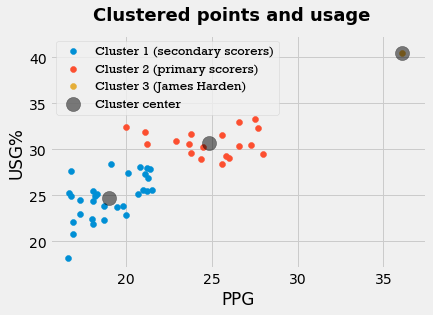

In [22]:
plt.style.use('fivethirtyeight')

pts_usg_clustered, ax = plt.subplots()

cluster_1 = []
cluster_2 = []
cluster_3 = []

for i in range(len(y_kmeans)):
    if(y_kmeans[i] == 0):
        cluster_1.append(x[i])
    elif(y_kmeans[i] == 1):
        cluster_2.append(x[i])
    elif(y_kmeans[i] == 2):
        cluster_3.append(x[i])
        
cluster_1 = np.vstack(cluster_1)
cluster_2 = np.vstack(cluster_2)
cluster_3 = np.vstack(cluster_3)

ax.scatter(cluster_1[:, 0], cluster_1[:, 1], label = "Cluster 1 (secondary scorers)")
ax.scatter(cluster_2[:, 0], cluster_2[:, 1], label = "Cluster 2 (primary scorers)")
ax.scatter(cluster_3[:, 0], cluster_3[:, 1], label = "Cluster 3 (James Harden)")

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = .5, label = 'Cluster center')

ax.legend(loc='best', prop={'size': 12, "family": "Rockwell"})

ax.set_xlabel('PPG')
ax.set_ylabel('USG%')

pts_usg_clustered.suptitle("Clustered points and usage", weight = 'bold', size = 18)

pts_usg_clustered.savefig('pts-usg-clustered.png', dpi = 400, bbox_inches = 'tight')

In [23]:
kmeans = KMeans(n_clusters = 4, random_state = 99)

x = np.column_stack((df_counting['AST'], df_advanced['USG%']))

kmeans.fit(x)

y_kmeans = kmeans.predict(x)

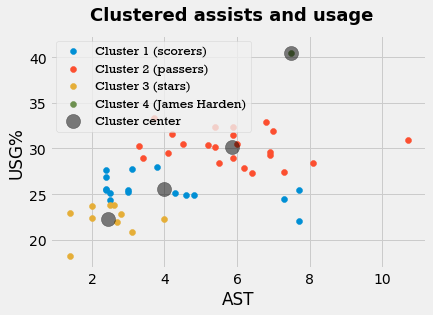

In [24]:
plt.style.use('fivethirtyeight')

ast_usg_clustered, ax = plt.subplots()

cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []

for i in range(len(y_kmeans)):
    if(y_kmeans[i] == 2):
        cluster_1.append(x[i])
    elif(y_kmeans[i] == 1):
        cluster_2.append(x[i])
    elif(y_kmeans[i] == 0):
        cluster_3.append(x[i])
    elif(y_kmeans[i] == 3):
        cluster_4.append(x[i])
        
cluster_1 = np.vstack(cluster_1)
cluster_2 = np.vstack(cluster_2)
cluster_3 = np.vstack(cluster_3)
cluster_4 = np.vstack(cluster_4)

ax.scatter(cluster_1[:, 0], cluster_1[:, 1], label = "Cluster 1 (scorers)")
ax.scatter(cluster_2[:, 0], cluster_2[:, 1], label = "Cluster 2 (passers)")
ax.scatter(cluster_3[:, 0], cluster_3[:, 1], label = "Cluster 3 (stars)")
ax.scatter(cluster_4[:, 0], cluster_4[:, 1], label = "Cluster 4 (James Harden)")

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = .5, label = 'Cluster center')

ax.legend(loc='best', prop={'size': 12, "family": "Rockwell"})

ax.set_xlabel('AST')
ax.set_ylabel('USG%')

ast_usg_clustered.suptitle("Clustered assists and usage", weight = 'bold', size = 18)

ast_usg_clustered.savefig('ast-usg-clustered.png', dpi = 400, bbox_inches = 'tight')

# Cluster NBA  players

In [25]:
df_full_nba = pd.read_csv('/Users/brandonmojica/Desktop/positional-clustering/final-csv-data/full-nba-data.csv')

In [26]:
df_full_nba.head()

,Player,Pos,Age,Tm,G,MP,MPG,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,James Harden,1,29,HOU,78,2867,36.8,10.8,24.5,0.442,...,14.5,40.5,11.4,3.8,15.2,0.254,10.5,1.1,11.7,9.9
1,Paul George,2,28,OKC,77,2841,36.9,9.2,21.0,0.438,...,10.0,29.5,7.0,4.9,11.9,0.201,4.7,0.7,5.5,5.3
2,Giannis Antetokounmpo,3,24,MIL,72,2358,32.8,10.0,17.3,0.578,...,14.8,32.3,8.9,5.5,14.4,0.292,5.7,5.0,10.8,7.6
3,Joel Embiid,3,24,PHI,64,2154,33.7,9.1,18.7,0.484,...,13.2,33.3,4.9,3.8,8.7,0.194,2.0,2.1,4.1,3.3
4,LeBron James,2,34,LAL,55,1937,35.2,10.1,19.9,0.510,...,13.3,31.6,4.7,2.6,7.2,0.179,6.2,1.9,8.1,4.9


In [19]:
df_full_nba.columns.values

array(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'MPG', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP'], dtype=object)

In [28]:
features = ['Pos', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
            'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
            'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']

In [29]:
x = df_full_nba.loc[:, features].values

In [31]:
x = StandardScaler().fit_transform(x)

In [32]:
pca_list = []

for n_components in range(2, 11):
    pca = PCA(n_components = n_components)
    components = pca.fit_transform(x)
    pca_variance = sum(pca.explained_variance_ratio_)
    pca_list.append(pca_variance)
    print("For n_components = {}, explained variance ratio is {}".format(n_components, pca_variance))

For n_components = 2, explained variance ratio is 0.6333520677285182
For n_components = 3, explained variance ratio is 0.7178334942616984
For n_components = 4, explained variance ratio is 0.7814588277173942
For n_components = 5, explained variance ratio is 0.8295121022750757
For n_components = 6, explained variance ratio is 0.8585807560284049
For n_components = 7, explained variance ratio is 0.8810612591907596
For n_components = 8, explained variance ratio is 0.9016774045359962
For n_components = 9, explained variance ratio is 0.9192163824381704
For n_components = 10, explained variance ratio is 0.9327924287737549


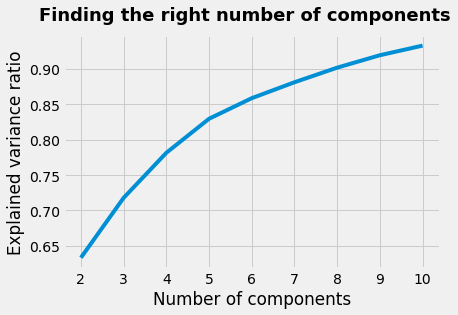

In [33]:
plt.style.use('fivethirtyeight')

pca_fig, ax = plt.subplots()

ax.plot(range(2, 11), pca_list)

ax.set_xlabel('Number of components')
ax.set_ylabel('Explained variance ratio')

ax.set_xticks(np.arange(2, 11, 1.0))

pca_fig.suptitle("Finding the right number of components", weight = 'bold', size = 18)

pca_fig.savefig('pca-variance.png', dpi = 400, bbox_inches = 'tight')

In [36]:
pca = PCA(n_components = 6)

components = pca.fit_transform(x)

pca_df = pd.DataFrame(data = components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6'])

pca_df['Player'] = df_full_nba['Player']
pca_df = pca_df[['Player', 'PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6']]

In [37]:
pca_df.teail()

,Player,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
0,James Harden,12.480375,11.488923,-3.046188,2.799767,-0.274446,0.950593
1,Paul George,7.645584,6.583040,-1.620042,2.119232,-2.979916,-0.956373
2,Giannis Antetokounmpo,15.294763,1.618989,-0.298906,1.044728,0.335343,0.929695
3,Joel Embiid,11.352176,1.545779,2.224731,-3.080351,-2.747073,1.781307
4,LeBron James,8.653727,5.381184,0.464913,0.374554,1.403629,0.626366


In [28]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.4069444  0.22640766 0.08448143 0.06362533 0.04805327 0.02906865]
0.8585807560284048


In [38]:
x = np.column_stack((pca_df['PC 1'], pca_df['PC 2'], pca_df['PC 3'], pca_df['PC 4'], pca_df['PC 5'], pca_df['PC 6']))

silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(x)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(x, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.36256219336991613
For n_clusters = 3, silhouette score is 0.3638804539706731
For n_clusters = 4, silhouette score is 0.26627094207510826
For n_clusters = 5, silhouette score is 0.20192155935236533
For n_clusters = 6, silhouette score is 0.18922852238863766
For n_clusters = 7, silhouette score is 0.18841572916786725
For n_clusters = 8, silhouette score is 0.19096456154348906
For n_clusters = 9, silhouette score is 0.18610004096267668
For n_clusters = 10, silhouette score is 0.17665674229828882
For n_clusters = 11, silhouette score is 0.17531647793597166
For n_clusters = 12, silhouette score is 0.15661523132636634
For n_clusters = 13, silhouette score is 0.1715086017418294
For n_clusters = 14, silhouette score is 0.16159167171031028
For n_clusters = 15, silhouette score is 0.15900855460137286
For n_clusters = 16, silhouette score is 0.156053832668698
For n_clusters = 17, silhouette score is 0.16503661764860644
For n_clusters = 18, silhouette scor

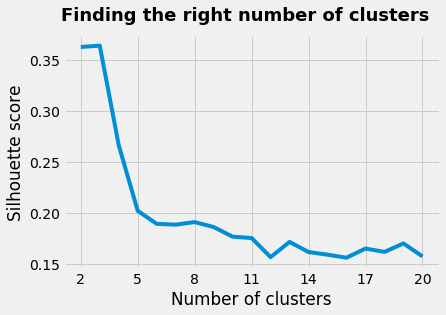

In [39]:
plt.style.use('fivethirtyeight')

silhouette_fig, ax = plt.subplots()

ax.plot(range(2, 21), silhouette)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

ax.set_xticks(np.arange(2, 21, 3.0))

silhouette_fig.suptitle("Finding the right number of clusters", weight = 'bold', size = 18)
silhouette_fig.savefig('silhouette-score.png', dpi = 400, bbox_inches = 'tight')

In [40]:
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1 - silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    print("For n_cluster = {}, percent improvement = {}".format(i + 2, improvement))

For n_cluster = 3, percent improvement = 0.002068061522309317
For n_cluster = 4, percent improvement = -0.1534452329044842
For n_cluster = 5, percent improvement = -0.08770183220592864
For n_cluster = 6, percent improvement = -0.015904498000757217
For n_cluster = 7, percent improvement = -0.0010024936041965749
For n_cluster = 8, percent improvement = 0.0031405640390350653
For n_cluster = 9, percent improvement = -0.00601274103652738
For n_cluster = 10, percent improvement = -0.011602529966407094
For n_cluster = 11, percent improvement = -0.0016278318305031902
For n_cluster = 12, percent improvement = -0.022676876776681176
For n_cluster = 13, percent improvement = 0.017659045987853617
For n_cluster = 14, percent improvement = -0.011969864807731989
For n_cluster = 15, percent improvement = -0.003080977397024176
For n_cluster = 16, percent improvement = -0.003513379296354646
For n_cluster = 17, percent improvement = 0.010643789056254072
For n_cluster = 18, percent improvement = -0.0039937

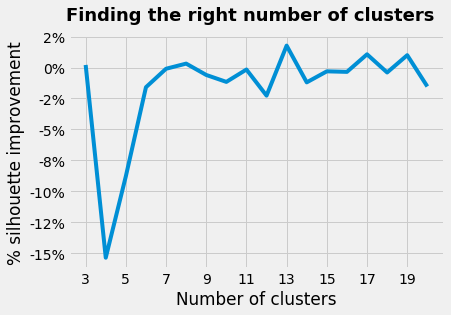

In [41]:
plt.style.use('fivethirtyeight')

silhouette_imp_fig, ax = plt.subplots()

ax.plot(range(3, 21), silhouette_diff)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('% silhouette improvement')

ax.set_xticks(np.arange(3, 21, 2.0))

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

silhouette_imp_fig.suptitle("Finding the right number of clusters", weight = 'bold', size = 18)

silhouette_imp_fig.savefig('silhouette-diff-score.png', dpi = 400, bbox_inches = 'tight')

In [42]:
kmeans = KMeans(n_clusters = 12, random_state = 1)

kmeans.fit(x)

y_kmeans = kmeans.predict(x)

In [16]:
df_full_nba

NameError: name 'df_full_nba' is not defined

In [119]:
cc = kmeans.cluster_centers_

In [122]:

df_full_nba.iloc[7].values

array(['Kawhi Leonard', 2, 27, 'TOR', 60, 2040, 34.0, 9.3, 18.8, 0.496,
       1.9, 5.0, 0.371, 7.5, 13.8, 0.542, 0.546, 6.1, 7.1,
       0.8540000000000001, 1.3, 6.0, 7.3, 3.3, 1.8, 0.4, 2.0, 1.5, 26.6,
       25.8, 0.606, 0.267, 0.377, 4.2, 18.6, 11.6, 16.4, 2.5, 1.0, 8.4,
       30.3, 6.1, 3.4, 9.5, 0.22399999999999998, 4.3, 0.7, 5.0, 3.6, 11],
      dtype=object)

In [52]:
df_full_nba['cluster'] = y_kmeans

In [77]:
pd.set_option('display.max_columns', None)
df_full_nba[df_full_nba['cluster']==11]

,Player,Pos,Age,Tm,G,MP,MPG,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cluster
0,James Harden,1,29,HOU,78,2867,36.8,10.8,24.5,0.442,4.8,13.2,0.368,6.0,11.3,0.528,0.541,9.7,11.0,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,11.4,3.8,15.2,0.254,10.5,1.1,11.7,9.9,11
1,Paul George,2,28,OKC,77,2841,36.9,9.2,21.0,0.438,3.8,9.8,0.386,5.4,11.1,0.484,0.529,5.9,7.0,0.839,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0,23.3,0.583,0.469,0.335,3.7,19.6,11.4,17.7,2.8,1.0,10.0,29.5,7.0,4.9,11.9,0.201,4.7,0.7,5.5,5.3,11
4,LeBron James,2,34,LAL,55,1937,35.2,10.1,19.9,0.510,2.0,5.9,0.339,8.1,14.0,0.582,0.560,5.1,7.6,0.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4,25.6,0.588,0.299,0.382,3.1,21.3,12.4,39.4,1.7,1.4,13.3,31.6,4.7,2.6,7.2,0.179,6.2,1.9,8.1,4.9,11
5,Stephen Curry,1,30,GSW,69,2331,33.8,9.2,19.4,0.472,5.1,11.7,0.437,4.0,7.7,0.525,0.604,3.8,4.2,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3,24.4,0.641,0.604,0.214,2.2,14.2,8.4,24.2,1.9,0.9,11.6,30.4,7.2,2.5,9.7,0.199,7.7,-1.4,6.3,4.9,11
7,Kawhi Leonard,2,27,TOR,60,2040,34.0,9.3,18.8,0.496,1.9,5.0,0.371,7.5,13.8,0.542,0.546,6.1,7.1,0.854,1.3,6.0,7.3,3.3,1.8,0.4,2.0,1.5,26.6,25.8,0.606,0.267,0.377,4.2,18.6,11.6,16.4,2.5,1.0,8.4,30.3,6.1,3.4,9.5,0.224,4.3,0.7,5.0,3.6,11
8,Kevin Durant,3,30,GSW,78,2702,34.6,9.2,17.7,0.521,1.8,5.0,0.353,7.5,12.8,0.587,0.571,5.7,6.5,0.885,0.4,5.9,6.4,5.9,0.7,1.1,2.9,2.0,26.0,24.2,0.631,0.281,0.366,1.4,17.5,9.8,26.2,1.0,2.6,12.3,29.0,8.6,2.9,11.5,0.204,4.2,0.1,4.3,4.3,11
10,Damian Lillard,1,28,POR,80,2838,35.5,8.5,19.2,0.444,3.0,8.0,0.369,5.6,11.1,0.499,0.522,5.9,6.4,0.912,0.9,3.8,4.6,6.9,1.1,0.4,2.7,1.9,25.8,23.7,0.588,0.419,0.335,2.6,11.1,7.0,30.6,1.5,1.0,10.8,29.3,9.7,2.4,12.1,0.205,6.6,-1.1,5.5,5.4,11
11,Bradley Beal,1,25,WAS,82,3028,36.9,9.3,19.6,0.475,2.5,7.3,0.351,6.8,12.4,0.548,0.540,4.4,5.5,0.808,1.1,3.9,5.0,5.5,1.5,0.7,2.7,2.8,25.6,20.8,0.581,0.370,0.278,3.1,11.7,7.4,24.1,1.9,1.6,11.0,28.4,5.9,1.7,7.6,0.120,3.9,-1.1,2.8,3.7,11
12,Kemba Walker,1,28,CHO,82,2863,34.9,8.9,20.5,0.434,3.2,8.9,0.356,5.7,11.6,0.494,0.511,4.6,5.5,0.844,0.6,3.8,4.4,5.9,1.2,0.4,2.6,1.6,25.6,21.7,0.558,0.434,0.267,1.9,11.9,6.8,29.4,1.7,1.0,10.1,31.5,5.5,1.9,7.4,0.123,5.1,-1.7,3.3,3.9,11
13,Blake Griffin,3,29,DET,75,2622,35.0,8.3,17.9,0.462,2.5,7.0,0.362,5.7,10.9,0.525,0.532,5.5,7.3,0.753,1.3,6.2,7.5,5.4,0.7,0.4,3.4,2.7,24.5,21.0,0.581,0.389,0.410,4.0,20.1,11.8,27.1,1.0,0.9,13.8,30.2,5.1,2.9,8.0,0.147,4.2,0.4,4.6,4.4,11


In [43]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = df_full_nba['Player']
df_cluster['Cluster'] = y_kmeans

df_cluster.head()

,Player,Cluster
0,James Harden,11
1,Paul George,11
2,Giannis Antetokounmpo,6
3,Joel Embiid,4
4,LeBron James,11


In [73]:
interest_stats = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'USG%']

def cluster_stats(cluster):
    
    print(df_full_nba[interest_stats].loc[df_full_nba['cluster'] == cluster].mean())

In [103]:
roles = df_full_nba.groupby('cluster').mean()


In [105]:
roles[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'USG%','WS']]

,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,USG%,WS
cluster,,,,,,,,,,
0,11.560870,6.478261,1.826087,0.817391,0.973913,0.499913,0.358870,0.750826,18.734783,4.986957
1,9.214286,2.422857,1.725714,0.594286,0.202857,0.435829,0.385343,0.831171,16.631429,2.968571
2,11.358333,4.033333,5.550000,1.366667,0.408333,0.447833,0.349167,0.793167,18.233333,5.283333
3,8.806522,2.993478,2.441304,0.752174,0.278261,0.416174,0.322913,0.749935,18.900000,1.217391
4,19.863636,10.172727,3.872727,0.863636,1.009091,0.531273,0.300182,0.769455,26.100000,8.663636
5,14.340741,5.155556,2.533333,0.837037,0.392593,0.438519,0.350148,0.774963,21.740741,2.803704
6,20.680000,13.140000,2.920000,1.220000,1.880000,0.589000,0.143800,0.677000,24.140000,11.820000
7,7.018750,3.981250,1.340625,0.696875,0.521875,0.448031,0.346594,0.728406,13.815625,2.953125
8,10.047619,7.380952,1.385714,0.642857,1.080952,0.601190,0.103286,0.666000,17.380952,6.014286


In [116]:
df_full_nba[df_full_nba['Tm'] == 'TOR'][['Pos','Player','cluster','MPG']]

,Pos,Player,cluster,MPG
7,2,Kawhi Leonard,11,34.0
49,3,Pascal Siakam,4,31.9
73,3,Serge Ibaka,0,27.2
78,1,Kyle Lowry,2,34.0
127,1,Fred VanVleet,1,27.5
143,1,Danny Green,1,27.7
177,1,Norman Powell,1,18.8
213,2,OG Anunoby,7,20.2


In [133]:
cluster_stats(5)

PTS     14.340741
TRB      5.155556
AST      2.533333
STL      0.837037
BLK      0.392593
FG%      0.438519
3P%      0.350148
FT%      0.774963
USG%    21.740741
dtype: float64


In [143]:
roles = ['Skilled Bigmen','Defensive 3-pt Shooters','floor general/assting guards','6th men/role players', 'Inside/Mid-range Bigmen ','perimiter scorer', 'Star Bigmen', 'Defensive Studs', 'Traditional Big', 'Team-leading Guard', 'Pure Shooters',
         'Star Ball-Handlers/All-Stars']

cluster_dict = dict(zip(list(range(1, 13)), roles))

In [142]:
df_full_nba[df_full_nba['cluster']==11]

,Player,Pos,Age,Tm,G,MP,MPG,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cluster


In [47]:
df_cluster[interest_stats] = df_full_nba[interest_stats]

In [123]:
df_full_nba[df_full_nba['Tm'] == 'TOR']

,Player,Pos,Age,Tm,G,MP,MPG,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cluster
7,Kawhi Leonard,2,27,TOR,60,2040,34.0,9.3,18.8,0.496,1.9,5.0,0.371,7.5,13.8,0.542,0.546,6.1,7.1,0.854,1.3,6.0,7.3,3.3,1.8,0.4,2.0,1.5,26.6,25.8,0.606,0.267,0.377,4.2,18.6,11.6,16.4,2.5,1.0,8.4,30.3,6.1,3.4,9.5,0.224,4.3,0.7,5.0,3.6,11
49,Pascal Siakam,3,24,TOR,80,2548,31.9,6.5,11.8,0.549,1.0,2.7,0.369,5.5,9.1,0.602,0.591,3.0,3.8,0.785,1.6,5.3,6.9,3.1,0.9,0.7,1.9,3.0,16.9,18.7,0.628,0.226,0.320,5.4,17.5,11.6,14.6,1.4,1.7,12.5,20.8,5.7,3.6,9.3,0.175,2.0,1.4,3.4,3.5,4
73,Serge Ibaka,3,29,TOR,74,2010,27.2,6.3,11.9,0.529,0.7,2.3,0.290,5.6,9.6,0.586,0.557,1.8,2.4,0.763,2.1,6.0,8.1,1.3,0.4,1.4,1.5,2.9,15.0,18.7,0.582,0.193,0.202,8.6,23.2,16.1,7.7,0.7,4.3,10.7,22.9,2.8,3.3,6.1,0.146,-0.7,1.2,0.5,1.3,0
78,Kyle Lowry,1,32,TOR,65,2213,34.0,4.7,11.4,0.411,2.4,7.0,0.347,2.3,4.4,0.514,0.518,2.5,3.0,0.830,0.6,4.2,4.8,8.7,1.4,0.5,2.8,2.6,14.2,16.5,0.562,0.613,0.263,2.1,12.9,7.6,34.8,2.0,1.2,18.1,19.6,3.6,3.0,6.6,0.144,2.5,0.6,3.1,2.8,2
127,Fred VanVleet,1,24,TOR,64,1760,27.5,3.8,9.4,0.410,1.8,4.6,0.378,2.1,4.8,0.441,0.503,1.5,1.8,0.843,0.3,2.3,2.6,4.8,0.9,0.3,1.3,1.7,11.0,13.7,0.539,0.493,0.192,1.3,8.7,5.1,23.9,1.6,0.9,11.2,17.9,2.4,1.9,4.3,0.117,0.7,-0.7,0.0,0.9,1
143,Danny Green,1,31,TOR,80,2216,27.7,3.7,7.9,0.465,2.5,5.4,0.455,1.2,2.4,0.487,0.622,0.5,0.6,0.841,0.8,3.2,4.0,1.6,0.9,0.7,0.9,2.1,10.3,13.0,0.632,0.690,0.070,3.0,12.2,7.7,7.7,1.6,2.0,10.4,14.1,3.0,2.9,5.9,0.128,1.7,1.2,2.9,2.7,1
177,Norman Powell,1,25,TOR,60,1126,18.8,3.2,6.7,0.483,1.1,2.8,0.400,2.1,3.8,0.543,0.568,1.0,1.3,0.827,0.3,2.1,2.3,1.5,0.7,0.2,1.1,1.6,8.6,13.3,0.596,0.425,0.188,1.6,11.5,6.7,11.6,1.7,1.0,13.1,19.0,1.0,1.4,2.4,0.102,-0.4,-0.3,-0.7,0.4,1
213,OG Anunoby,2,21,TOR,67,1352,20.2,2.7,6.0,0.453,1.0,3.0,0.332,1.7,3.0,0.574,0.536,0.5,0.9,0.581,0.9,2.1,2.9,0.7,0.7,0.3,0.8,2.1,7.0,9.8,0.544,0.500,0.153,4.8,10.8,7.9,4.7,1.6,1.3,11.3,15.5,0.3,1.7,2.0,0.070,-1.3,0.1,-1.2,0.3,7


In [48]:
df_cluster['Cluster'] = df_cluster['Cluster'] + 1

In [ ]:
df_fu

In [144]:
df_cluster['Role'] = df_cluster['Cluster'].map(cluster_dict)

In [13]:
df_cluster.head()

NameError: name 'df_cluster' is not defined

In [43]:
df_cluster = df_cluster[['Player', 'Cluster', 'Role', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'USG%','']]
df_cluster.to_csv('clustered-nba.csv')

In [146]:
df_avg = df_cluster.groupby('Role')[interest_stats].mean()

In [9]:
df_avg

NameError: name 'df_avg' is not defined

In [148]:
df_full_nba.to_csv('/Users/brandonmojica/Desktop/Galvanize/Capstones/Capstone_3/nba_postion_classification/data/')

,Player,Pos,Age,Tm,G,MP,MPG,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cluster
0,James Harden,1,29,HOU,78,2867,36.8,10.8,24.5,0.442,4.8,13.2,0.368,6.0,11.3,0.528,0.541,9.7,11.0,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,11.4,3.8,15.2,0.254,10.5,1.1,11.7,9.9,11
1,Paul George,2,28,OKC,77,2841,36.9,9.2,21.0,0.438,3.8,9.8,0.386,5.4,11.1,0.484,0.529,5.9,7.0,0.839,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0,23.3,0.583,0.469,0.335,3.7,19.6,11.4,17.7,2.8,1.0,10.0,29.5,7.0,4.9,11.9,0.201,4.7,0.7,5.5,5.3,11
2,Giannis Antetokounmpo,3,24,MIL,72,2358,32.8,10.0,17.3,0.578,0.7,2.8,0.256,9.3,14.5,0.641,0.599,6.9,9.5,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,30.9,0.644,0.163,0.550,7.3,30.0,19.3,30.3,1.8,3.9,14.8,32.3,8.9,5.5,14.4,0.292,5.7,5.0,10.8,7.6,6
3,Joel Embiid,3,24,PHI,64,2154,33.7,9.1,18.7,0.484,1.2,4.1,0.300,7.8,14.6,0.535,0.517,8.2,10.1,0.804,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5,26.1,0.593,0.219,0.541,8.1,34.0,21.4,18.4,1.0,4.4,13.2,33.3,4.9,3.8,8.7,0.194,2.0,2.1,4.1,3.3,4
4,LeBron James,2,34,LAL,55,1937,35.2,10.1,19.9,0.510,2.0,5.9,0.339,8.1,14.0,0.582,0.560,5.1,7.6,0.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4,25.6,0.588,0.299,0.382,3.1,21.3,12.4,39.4,1.7,1.4,13.3,31.6,4.7,2.6,7.2,0.179,6.2,1.9,8.1,4.9,11
5,Stephen Curry,1,30,GSW,69,2331,33.8,9.2,19.4,0.472,5.1,11.7,0.437,4.0,7.7,0.525,0.604,3.8,4.2,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3,24.4,0.641,0.604,0.214,2.2,14.2,8.4,24.2,1.9,0.9,11.6,30.4,7.2,2.5,9.7,0.199,7.7,-1.4,6.3,4.9,11
6,Devin Booker,1,22,PHO,64,2242,35.0,9.2,19.6,0.467,2.1,6.5,0.326,7.0,13.1,0.536,0.521,6.1,7.1,0.866,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6,20.2,0.584,0.330,0.362,1.9,11.3,6.5,34.1,1.2,0.5,15.4,32.9,3.3,0.3,3.5,0.076,3.8,-3.0,0.8,1.6,9
7,Kawhi Leonard,2,27,TOR,60,2040,34.0,9.3,18.8,0.496,1.9,5.0,0.371,7.5,13.8,0.542,0.546,6.1,7.1,0.854,1.3,6.0,7.3,3.3,1.8,0.4,2.0,1.5,26.6,25.8,0.606,0.267,0.377,4.2,18.6,11.6,16.4,2.5,1.0,8.4,30.3,6.1,3.4,9.5,0.224,4.3,0.7,5.0,3.6,11
8,Kevin Durant,3,30,GSW,78,2702,34.6,9.2,17.7,0.521,1.8,5.0,0.353,7.5,12.8,0.587,0.571,5.7,6.5,0.885,0.4,5.9,6.4,5.9,0.7,1.1,2.9,2.0,26.0,24.2,0.631,0.281,0.366,1.4,17.5,9.8,26.2,1.0,2.6,12.3,29.0,8.6,2.9,11.5,0.204,4.2,0.1,4.3,4.3,11
9,Anthony Davis,3,25,NOP,56,1850,33.0,9.5,18.3,0.517,0.9,2.6,0.331,8.6,15.7,0.547,0.540,6.1,7.7,0.794,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9,30.3,0.597,0.141,0.422,9.9,27.5,18.8,19.0,2.2,6.0,8.4,29.5,6.4,3.1,9.5,0.247,4.7,3.9,8.5,4.9,6


'/Users/brandonmojica/Desktop/positional-clustering'